# Assignment-4

In [1]:
pwd

'C:\\Users\\lenovo\\AppData\\Local\\Programs\\Python\\Python37\\Scripts'

# 1. Load the dataset and perform following pre-processing tasks: 
	

In [2]:
import numpy as np #numpy contains the mathematical stuffs
import pandas as pd #pandas allows us to import the datasets

In [3]:
#importing dataset
df=pd.read_csv('popularity.csv')
#the function will exactly read all the values of this dataset and will create a "dataframe" 
df

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score
0,19,147.3,23.9,19.1,14.6
1,91,28.6,1.5,33.0,7.3
2,166,17.9,37.6,21.6,8.0
3,196,94.2,4.9,8.1,9.7
4,42,293.6,27.7,1.8,20.7
...,...,...,...,...,...
195,155,4.1,11.6,5.7,3.2
196,80,76.4,26.7,22.3,11.8
197,181,218.5,5.4,27.4,12.2
198,145,140.3,1.9,9.0,10.3


# 1.1 Remove the first column of ‘Unnamed: 0’
	

In [4]:
# Remove column name 'unnamed' 
df1=df.drop(["Unnamed: 0"], axis = 1) 
df1 
#or
#del(df["Unnamed: 0"])

,avg_shares,avg_comments,avg_expert,popularity_score
0,147.3,23.9,19.1,14.6
1,28.6,1.5,33.0,7.3
2,17.9,37.6,21.6,8.0
3,94.2,4.9,8.1,9.7
4,293.6,27.7,1.8,20.7
...,...,...,...,...
195,4.1,11.6,5.7,3.2
196,76.4,26.7,22.3,11.8
197,218.5,5.4,27.4,12.2
198,140.3,1.9,9.0,10.3


# 1.2 Detect missing values, and replace them with the mean.


In [5]:
# Count total missing value at each column in a DataFrame 
df1.isnull().sum()


avg_shares          1
avg_comments        4
avg_expert          0
popularity_score    0
dtype: int64

In [6]:
# replacing missing values avg_shares &avg_comments in column with mean of that column 
df1['avg_shares'] = df1['avg_shares'].fillna(df1['avg_shares'].mean()) 
df1['avg_comments'] = df1['avg_comments'].fillna(df1['avg_comments'].mean()) 
df1
#or without checking missing value at each column in a dataframe
#newdf=df.fillna({'avg_shares':df['avg_shares'].mean(), 'avg_comments':df['avg_comments'].mean(),'avg_expert':df['avg_expert'].mean(),'popularity_score':df['popularity_score'].mean()}) 

,avg_shares,avg_comments,avg_expert,popularity_score
0,147.3,23.9,19.1,14.6
1,28.6,1.5,33.0,7.3
2,17.9,37.6,21.6,8.0
3,94.2,4.9,8.1,9.7
4,293.6,27.7,1.8,20.7
...,...,...,...,...
195,4.1,11.6,5.7,3.2
196,76.4,26.7,22.3,11.8
197,218.5,5.4,27.4,12.2
198,140.3,1.9,9.0,10.3


In [7]:
# Count total missing value at each column in a DataFrame 
df1.isnull().sum()


avg_shares          0
avg_comments        0
avg_expert          0
popularity_score    0
dtype: int64

# 1.3 Draw box-plots for each attribute to detect if there are any outliers. If there are outliers, ignore them for now.



<AxesSubplot:>

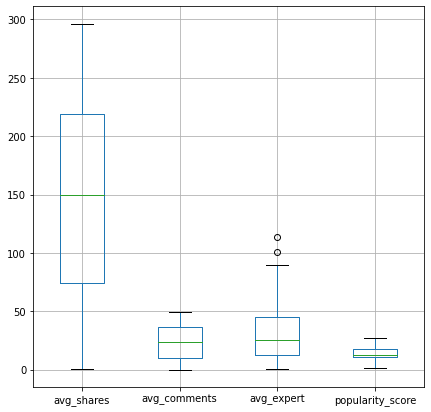

In [8]:
#An outlier is an observation that is numerically distant from the rest of the data.
#When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.
import matplotlib.pyplot as plt
plt. rcParams["figure.figsize"] = (7, 7)
df.boxplot(column=["avg_shares", "avg_comments", "avg_expert", "popularity_score"]) 
#hence we can say that column "avg_expert" has an outlier

# 1.4 Normalize all attributes within the range of 0 to 1.

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
ndf=pd.DataFrame(scaler.fit_transform(df1),
            columns=df1.columns, index=df1.index) 
ndf
#or
#normalized=(newdf - newdf.min()) / (newdf.max() - newdf.min())

,avg_shares,avg_comments,avg_expert,popularity_score
0,0.495773,0.481855,0.165347,0.511811
1,0.094352,0.030242,0.287599,0.224409
2,0.058167,0.758065,0.187335,0.251969
3,0.316199,0.098790,0.068602,0.318898
4,0.990531,0.558468,0.013193,0.751969
...,...,...,...,...
195,0.011498,0.233871,0.047493,0.062992
196,0.256003,0.538306,0.193492,0.401575
197,0.736557,0.108871,0.238347,0.417323
198,0.472100,0.038306,0.076517,0.342520


# 2. Visualize through scatter plots the relationship of each attribute with the target attribute. 

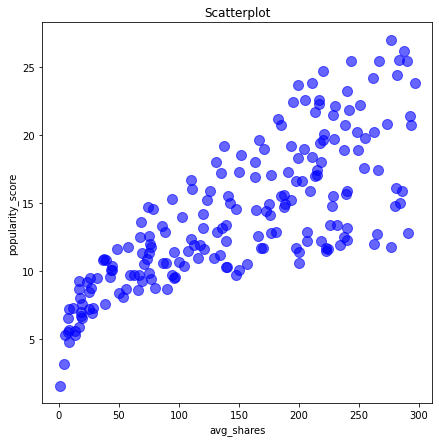

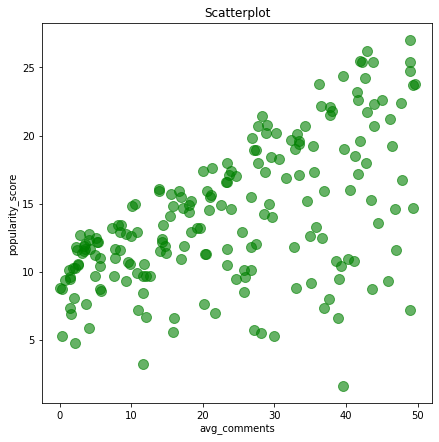

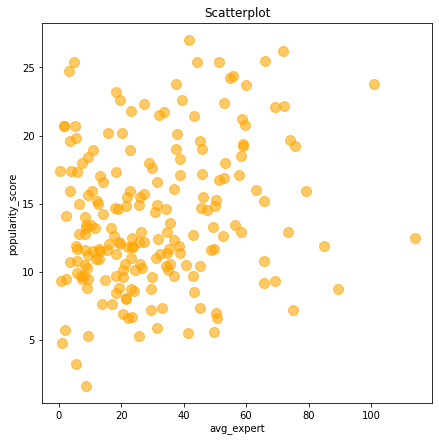

In [10]:
#target attribute here is popularity_score
x=df1['avg_shares']
a=df1['popularity_score']
plt.scatter(x,a,c='blue' ,s=100,alpha=0.6)
plt.xlabel('avg_shares')
plt.ylabel('popularity_score')
plt.title('Scatterplot')
plt.show()


y=df1['avg_comments']
a=df1['popularity_score']
plt.scatter(y,a,c='green' ,s=100,alpha=0.6)
plt.xlabel('avg_comments')
plt.ylabel('popularity_score')
plt.title('Scatterplot')
plt.show()

z=df1['avg_expert']
a=df1['popularity_score']
plt.scatter(z,a,c='orange' ,s=100,alpha=0.6)
plt.xlabel('avg_expert')
plt.ylabel('popularity_score')
plt.title('Scatterplot')
plt.show()

# 3. Split the dataset into train and test, into 70% and 30% respectively. 


In [11]:
# Train & Test split        
from sklearn.model_selection import train_test_split 
train_data,test_data = train_test_split(df1,test_size = 0.3,random_state=42)

In [12]:
train_data

,avg_shares,avg_comments,avg_expert,popularity_score
169,184.9,43.9,1.7,20.7
97,142.9,29.3,12.6,15.0
31,248.4,30.2,20.3,20.2
12,296.4,36.3,100.9,23.8
35,117.2,14.7,5.4,11.9
...,...,...,...,...
106,8.6,2.1,1.0,4.8
14,232.1,8.6,8.7,13.4
92,199.1,30.6,38.7,18.3
179,76.4,0.8,14.8,9.4


In [13]:
test_data

,avg_shares,avg_comments,avg_expert,popularity_score
95,44.500000,39.300000,45.1,10.4
15,206.900000,8.400000,26.4,12.9
30,95.700000,1.400000,7.4,9.5
158,281.400000,39.600000,55.8,24.4
128,31.500000,24.600000,2.2,9.5
115,239.800000,4.100000,36.9,12.3
69,48.300000,47.000000,8.5,11.6
170,7.300000,28.100000,41.4,5.5
174,23.800000,35.100000,65.9,9.2
45,70.600000,23.319388,40.8,10.5


# 4. Train the linear regression model and print the coefficients (parameters) learned by the final model.

In [14]:
#Split the train and test data set into X_train, y_train, X_test and y_test
X_train = train_data.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values
y_train = train_data.iloc[:, 1].values
y_test = test_data.iloc[:, 1].values

In [15]:
#Fitting of Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)
print(model)

LinearRegression()


In [16]:
predictions = regressor.predict(X_test)
print(predictions)


[39.3         8.4         1.4        39.6        24.6         4.1
 47.         28.1        35.1        23.31938776 11.7         2.4
 47.7        16.9        20.5         8.4         9.6        29.5
  7.7        37.7        48.9        42.8         5.7        33.2
 49.          9.9         2.3        21.3         4.9        49.6
 16.         41.3        49.         17.4        10.8        18.4
 43.         21.1        32.9        28.8         2.1         5.4
  7.3        49.4        43.9        11.6         3.7         7.6
  5.8        21.          5.2        14.8        46.4        20.6
 41.7        25.8        20.3        17.2        25.9        46.2       ]


In [17]:
# R square score
regressor.score(X_test,y_test)

1.0

In [18]:
#Printing regression coefficients
print(regressor.coef_)

[-8.30429068e-18  1.00000000e+00 -1.11022302e-16]


# 5. Print the confidence interval and p-value of each of the coefficients, and explain your interpretations. 


In [19]:
import statsmodels.api as sm 

In [20]:
model = sm.OLS(y_train, X_train).fit()
S_model = model.summary()
print(S_model)


# Interpretation for Confiedence Interval 
# Confiedence Interval of coefficient 1 i.e x1 is in the range [2.89e-17    5.43e-17]
# Confiedence Interval of coefficient 2 i.e x2 is in the range [1.000       1.000]
# Confiedence Interval of coefficient 3 i.e x3 is in the range [-9.57e-17    2.63e-17]


# Interpretation for p-value
# The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect).
#A low p-value (< 0.05) indicates that you can reject the null hypothesis. 
#In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model 
#because changes in the predictor's value are related to changes in the response variable.

#Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes
#in the response.

#In the output below, we can see that the predictor variables of x1 and x2 are significant
#because both of their p-values are 0.000. However, the p-value for x3 (0.263) is greater than the common alpha level of 0.05,
#which indicates that it is not statistically significant

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.061e+32
Date:                Wed, 10 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:04:21   Log-Likelihood:                          4279.6
No. Observations:                 140   AIC:                                     -8553.
Df Residuals:                     137   BIC:                                     -8544.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 6. Evaluate the logistic regression model and print the values of RMSE, MAE, and MSE. 

In [21]:
#Evaluating the linear regression model
y_pred=regressor.predict(X_test)

In [22]:
#Printing values of RMSE,MAE and MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1.9022230307251252e-29
4.361448189220096e-15
3.378778738275893e-15


# 7. Plot residual curve and Q-Q plot. 

In [23]:
# Residual is the difference between actual and predicted values of the target variable
residual = y_test - y_pred
residual

array([ 7.10542736e-15,  0.00000000e+00, -5.10702591e-15,  7.10542736e-15,
       -3.55271368e-15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.10542736e-15,  0.00000000e+00, -1.77635684e-15, -3.10862447e-15,
        7.10542736e-15,  3.55271368e-15,  0.00000000e+00,  1.77635684e-15,
       -5.32907052e-15, -3.55271368e-15, -2.66453526e-15,  7.10542736e-15,
        7.10542736e-15,  0.00000000e+00, -1.77635684e-15,  7.10542736e-15,
        7.10542736e-15, -1.77635684e-15, -1.77635684e-15,  3.55271368e-15,
       -4.44089210e-15,  7.10542736e-15, -3.55271368e-15,  7.10542736e-15,
        0.00000000e+00,  0.00000000e+00, -5.32907052e-15,  0.00000000e+00,
        7.10542736e-15, -3.55271368e-15,  7.10542736e-15,  0.00000000e+00,
       -2.22044605e-15, -1.77635684e-15, -3.55271368e-15,  7.10542736e-15,
        0.00000000e+00, -5.32907052e-15, -4.88498131e-15, -4.44089210e-15,
       -2.66453526e-15,  0.00000000e+00, -2.66453526e-15, -1.77635684e-15,
        7.10542736e-15, -

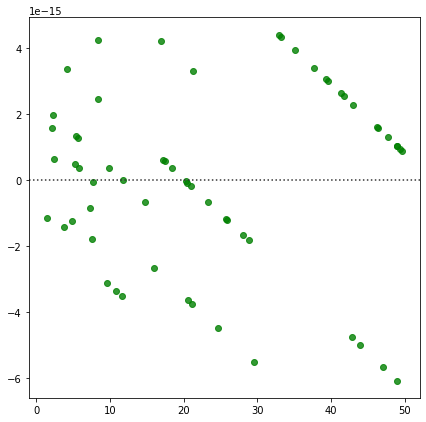

In [24]:
# Creating residual plot with predicted value on x-axis and residual values on y-axis
import seaborn as sns
sns.residplot(x=y_pred,y=residual,data=df1,color='green')
plt.show()

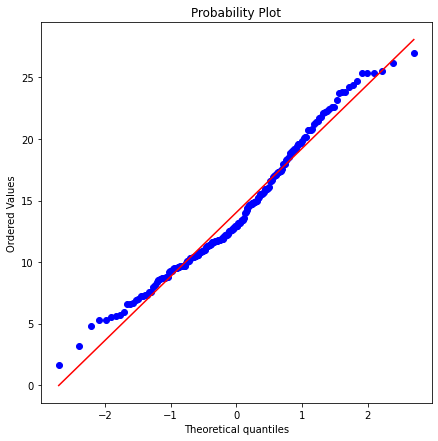

In [25]:
# Q-Q plot of the target variable 
from scipy import stats
stats.probplot(df1['popularity_score'], dist="norm", plot=plt)
plt.show()